# Introduction 

### The purpose of this project is to analyze and visualize the behavior of the weather in Australia. To get to knows if it will rain or not the next day.
### Moreover, the benefits of the system are to help any person decide whether he wants to go out and have some outside activities or not because it may rain tomorrow.

In [10]:
#import libraries
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [11]:
df = pd.read_csv('weatherAUS.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [13]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Cleaning the data

In [15]:
missing_data = df.isnull().sum()

missing_data_per = (missing_data/df.shape[0]) * 100

dic = {'missing data': missing_data, 'missing_percentage':missing_data_per}

desc = pd.DataFrame(dic)
desc

,missing data,missing_percentage
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


### Remove all the column with missing value above than 15%.

In [16]:
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)

In [17]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

### We can see that we have Unbalanced dataset

### Seperating the numerical and categorical data

In [18]:
df_cat=df.select_dtypes('object').columns
df_num=df.select_dtypes('float64').columns

### Filling the missing values of numerical feature using mean and the categorical features using mode.

In [19]:
for i in df_num:
    df[i].fillna(df[i].mean(), inplace=True)

In [20]:
for i in df_cat:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [21]:
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


### Check if there is any duplicate data

In [22]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


# Data Exploration

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

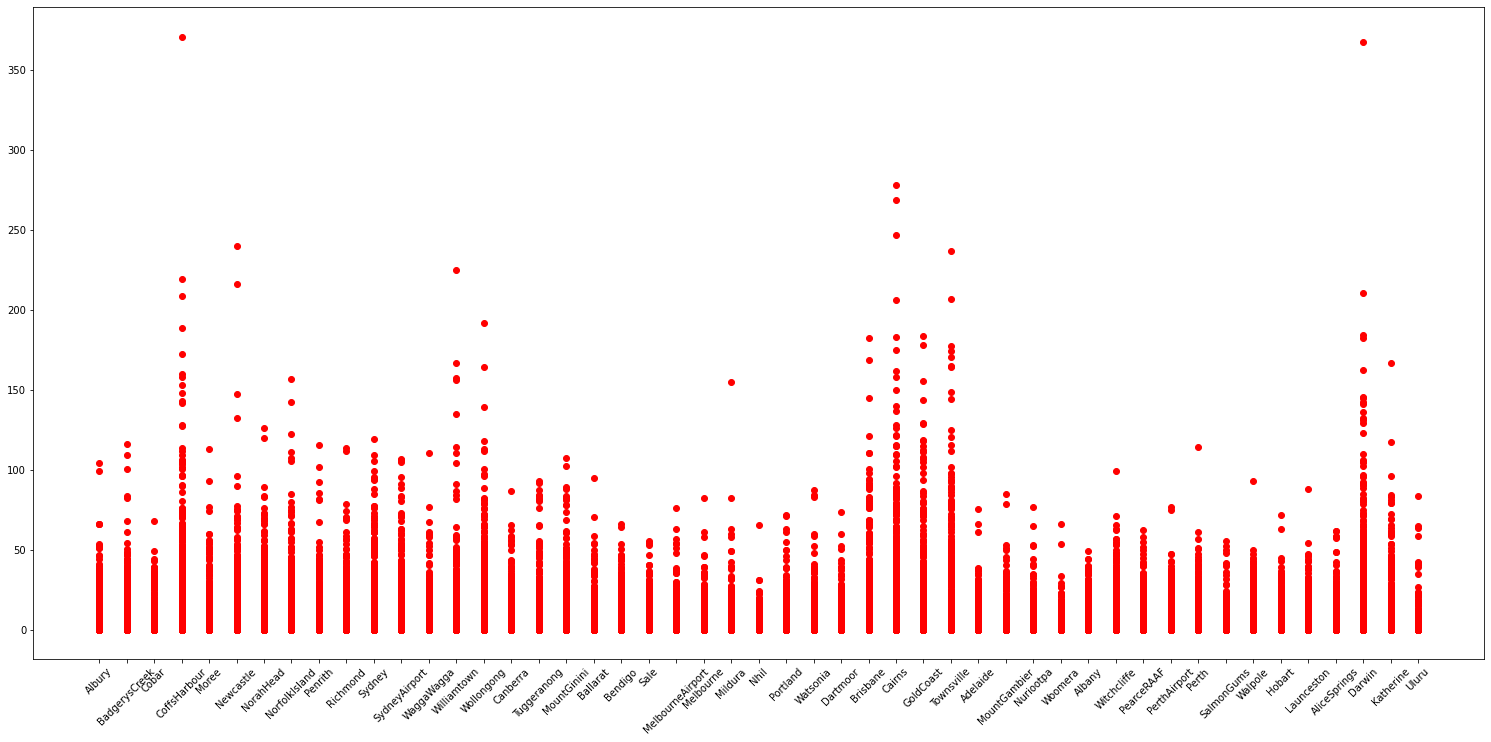

In [23]:
plt.figure(figsize=(26,12))
plt.scatter(x=df['Location'],y=df['Rainfall'], c='red')
plt.xticks(rotation=45)


<AxesSubplot:xlabel='MaxTemp', ylabel='RainTomorrow'>

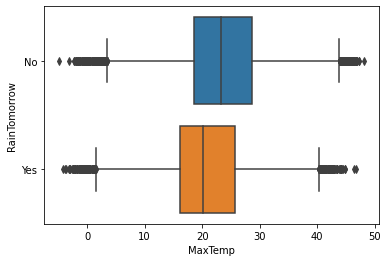

In [24]:
sns.boxplot(data = df, y = 'RainTomorrow', x = 'MaxTemp')

<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

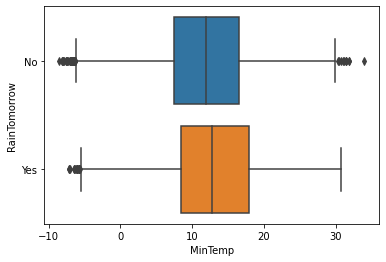

In [25]:
sns.boxplot(data = df, y = 'RainTomorrow', x = 'MinTemp')

### Not much impact of min or max temperature is on rain tomorrow

<AxesSubplot:xlabel='Humidity9am', ylabel='RainTomorrow'>

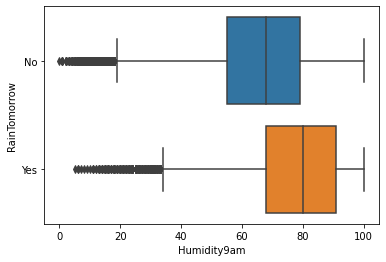

In [26]:
sns.boxplot(data = df, y = 'RainTomorrow', x = 'Humidity9am')

<AxesSubplot:xlabel='Humidity3pm', ylabel='RainTomorrow'>

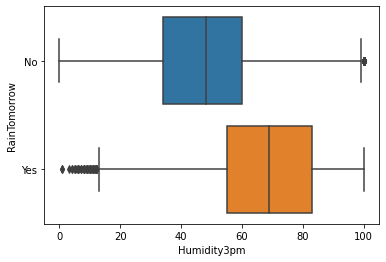

In [27]:
sns.boxplot(data = df, y = 'RainTomorrow', x = 'Humidity3pm')

### Humidity at 9am or 3pm in range of 55-90 can cause rain next day.

In [28]:
plt.figure(figsize=(15,10))
sb.heatmap(df[df_num].corr(), annot=True)

NameError: name 'sb' is not defined

<Figure size 1080x720 with 0 Axes>

### Teamp9am and Temp3pm have high correlation with MaxTemp and MinTemp so we will remove them.

In [29]:
df.drop('Temp9am',axis=1,inplace=True)
df.drop('Temp3pm',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)

In [30]:
Encoding = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

for i in Encoding:
    Transformimg = pd.get_dummies(df[i], prefix=i, prefix_sep='_', drop_first=True) 
    

    df = df.join(Transformimg)
    
    df.drop(i, axis = 1, inplace = True)

In [31]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,...,0.068239,0.103575,0.064616,0.056070,0.064306,0.069504,0.061006,0.065434,0.219167,0.219146
std,6.365750,7.088124,8.382488,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,...,0.252156,0.304709,0.245847,0.230058,0.245299,0.254310,0.239343,0.247291,0.413683,0.413669
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.100000,22.700000,0.000000,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,1.000000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Spliting the training and testing data

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('RainTomorrow_Yes', axis=1), df['RainTomorrow_Yes'], 
                                                    test_size = 0.2, random_state=42)

train_df = X_train.copy()
train_df['RainTomorrow_Yes'] = y_train
train_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
111548,14.5,17.8,14.2,40.03523,0.0,18.662657,94.0,51.539116,1024.1,1022.5,...,0,1,0,0,0,0,0,0,1,1
142528,24.6,39.5,0.0,31.00000,9.0,17.000000,52.0,21.000000,1011.8,1006.6,...,0,0,0,0,0,0,0,0,0,0
65304,14.7,26.6,0.2,30.00000,7.0,11.000000,87.0,57.000000,1018.2,1015.4,...,1,0,0,0,0,0,0,0,0,0
40651,18.3,26.6,0.0,28.00000,11.0,22.000000,79.0,67.000000,1017.0,1016.5,...,0,0,1,0,0,0,0,0,0,0
97487,11.4,19.3,0.6,31.00000,13.0,19.000000,63.0,47.000000,1018.6,1017.1,...,0,0,0,1,0,0,0,0,0,0


In [34]:
std_scale = StandardScaler()


X_train = std_scale.fit_transform(X_train)

lm3 = LogisticRegression()
lm3.fit(X_train, y_train)

y_predict = lm3.predict(X_train) 
lm3.score(X_train, y_train)

0.8464268527430221

In [35]:
lm3.score(X_test, y_test)

0.7793207754709198

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score

In [135]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [136]:
predictions = rfc.predict(X_test)

0.2229822631651313

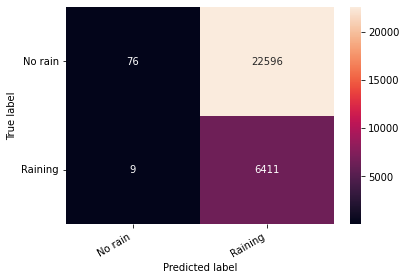

In [137]:
conf_matrix = confusion_matrix(y_test, predictions)
classes = ['No rain', 'Raining']
df_conf_matrix = pd.DataFrame(conf_matrix, index=classes, columns=classes)
hmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

accuracy_score(y_test, predictions)

# Conclusion

### We can see that the accuracy is not that high Because of the outlier in the dataset.

<AxesSubplot:>

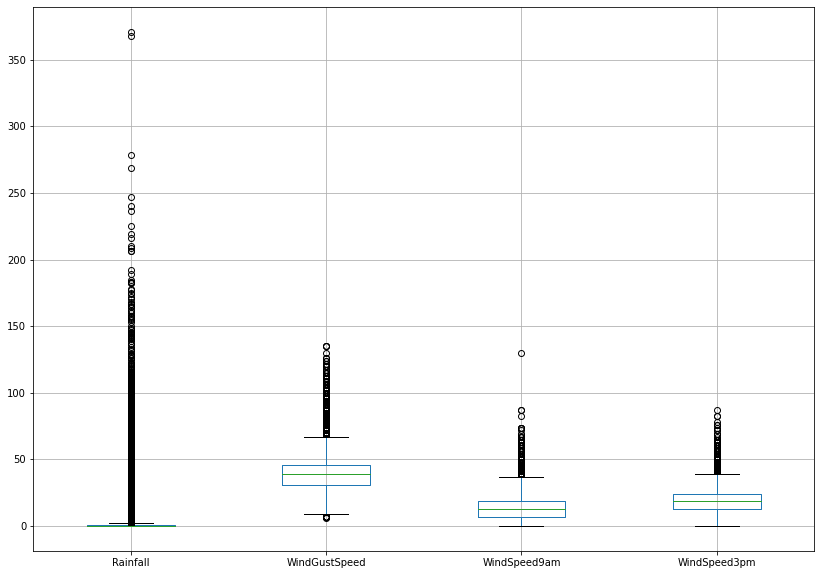

In [142]:
plt.figure(figsize=(14,10))
df.boxplot(column=['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm'])

### In the future maybe I have to do some data engineering to reduce the outlier.